# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


2022-11-07 10:00:26.364160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:00:26.827890: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 10:00:27.727362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:00:27.727462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
data_size = 'small'

In [4]:
df = pd.read_csv('/home/philippe/development/python/EZStacking/dataset/iris.csv')

In [5]:
target_col = 'variety'

#### Thresholds

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 0.95

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

In [17]:
CPU = True

In [18]:
level_1_model = 'regression'

#### Drop user's columns:

In [19]:
user_drop_cols = []

Dataset before deletion

In [20]:
display(df)

sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [21]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [22]:
display(df)

sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

#### Dataset copy

In [23]:
df_copy = df.copy()

### Dataset Information

In [24]:
df.shape

(150, 5)

#### Some records

In [25]:
display(df)

sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

#### Dataframe structure

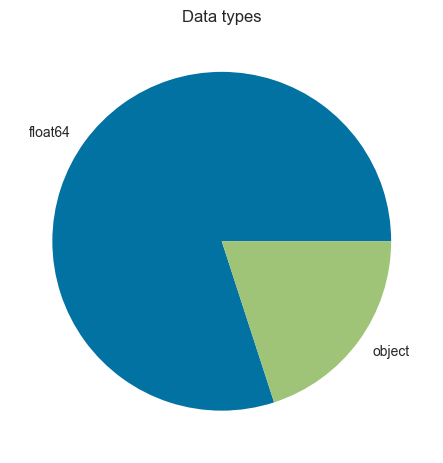

In [26]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [27]:
display(df.describe().T)

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

#### Which columns could be categorical ?

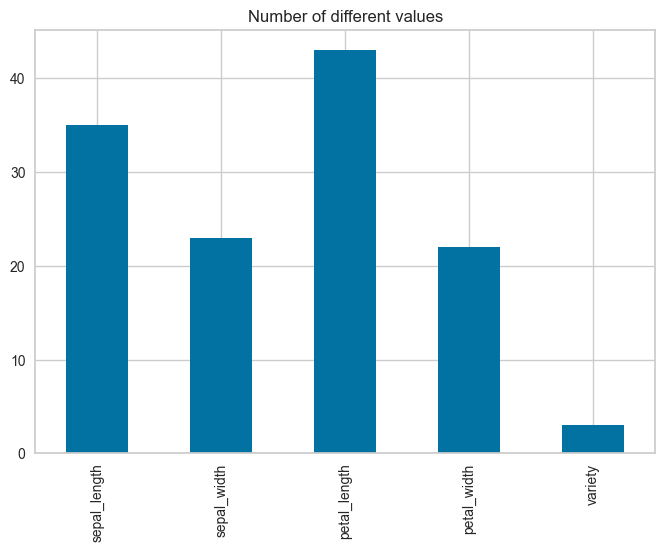

In [28]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [29]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]

#### Drop NaN:

In [30]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [31]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [32]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [33]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: sepal_length
Encoding numeric column: sepal_width
Encoding numeric column: petal_length
Encoding numeric column: petal_width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


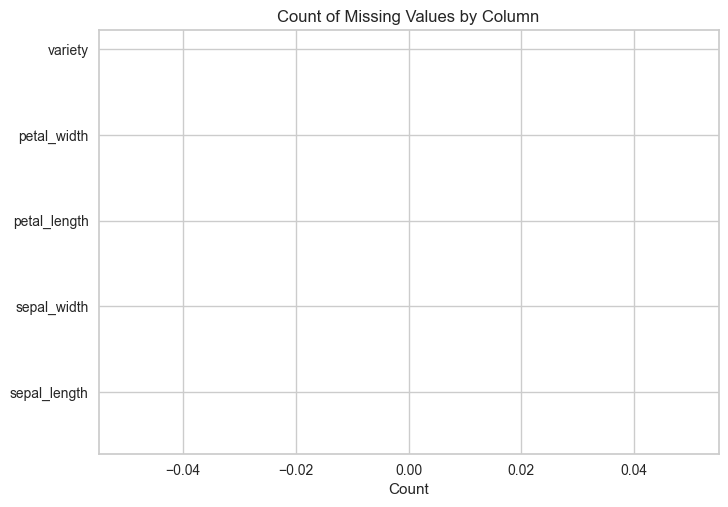

In [34]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [35]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [36]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

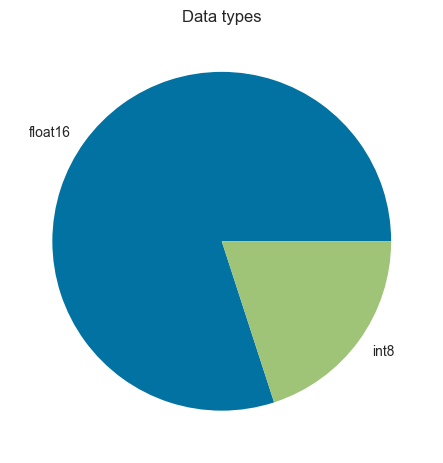

In [37]:
plot_dataframe_structure(df)

#### Outliers:

In [38]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

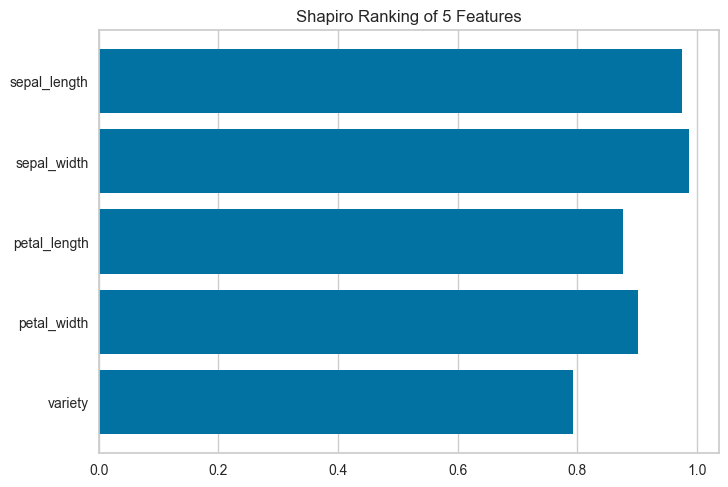

In [39]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

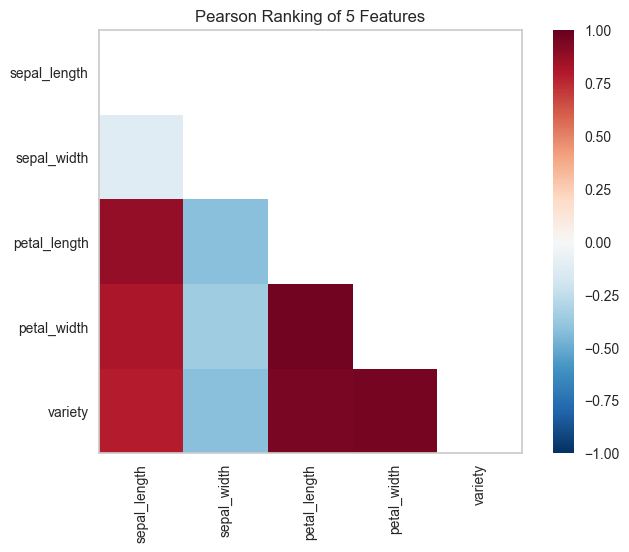

In [40]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

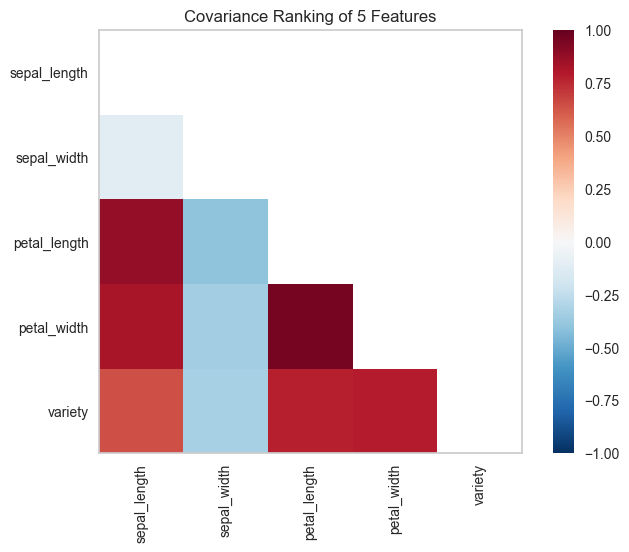

In [41]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

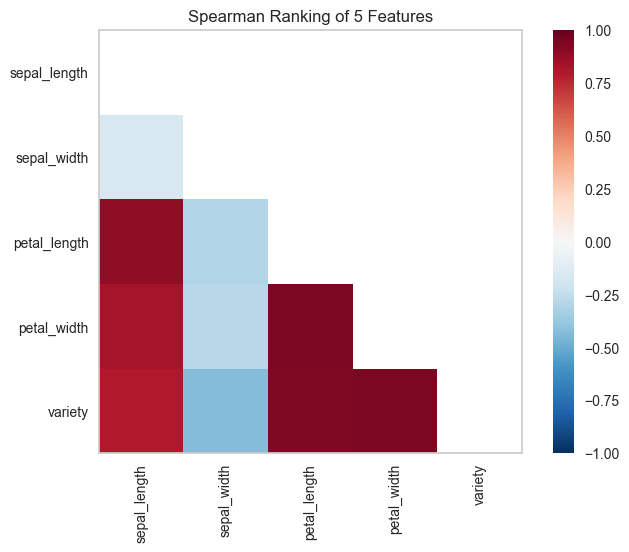

In [42]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

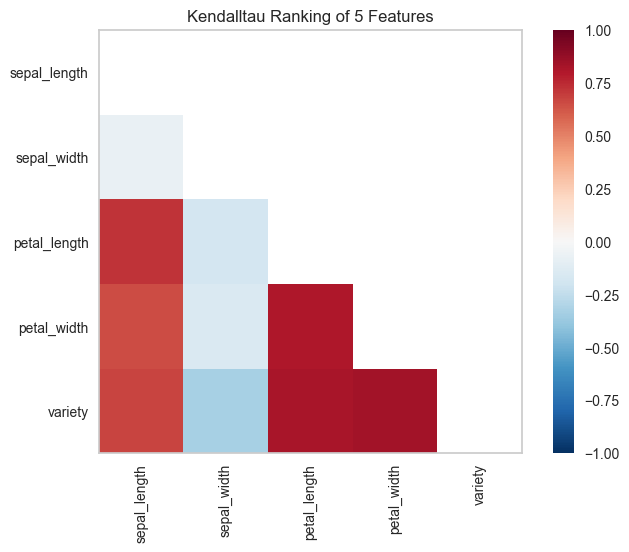

In [43]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [44]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [45]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [46]:
y = df[target_col]

In [47]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

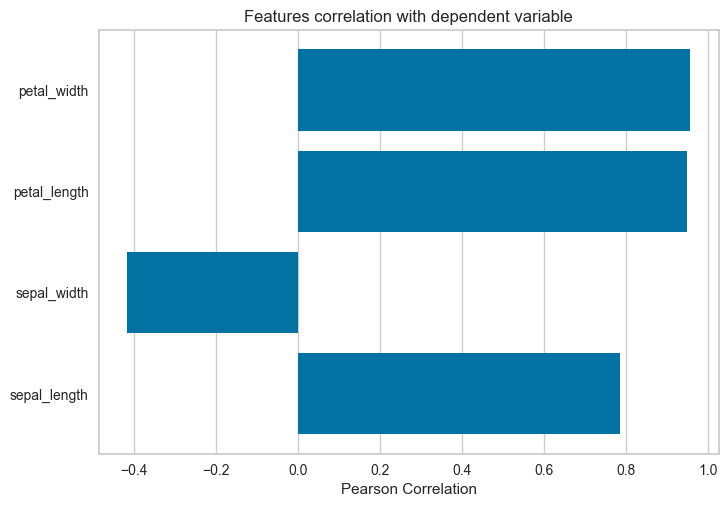

In [48]:
feature_correlation(X, y);

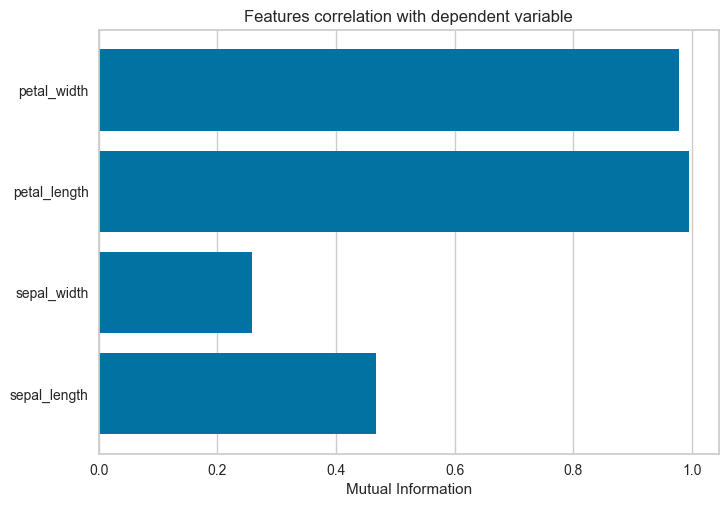

In [49]:
feature_correlation(X, y, method='mutual_info-classification');

###### Correlation with Seaborn

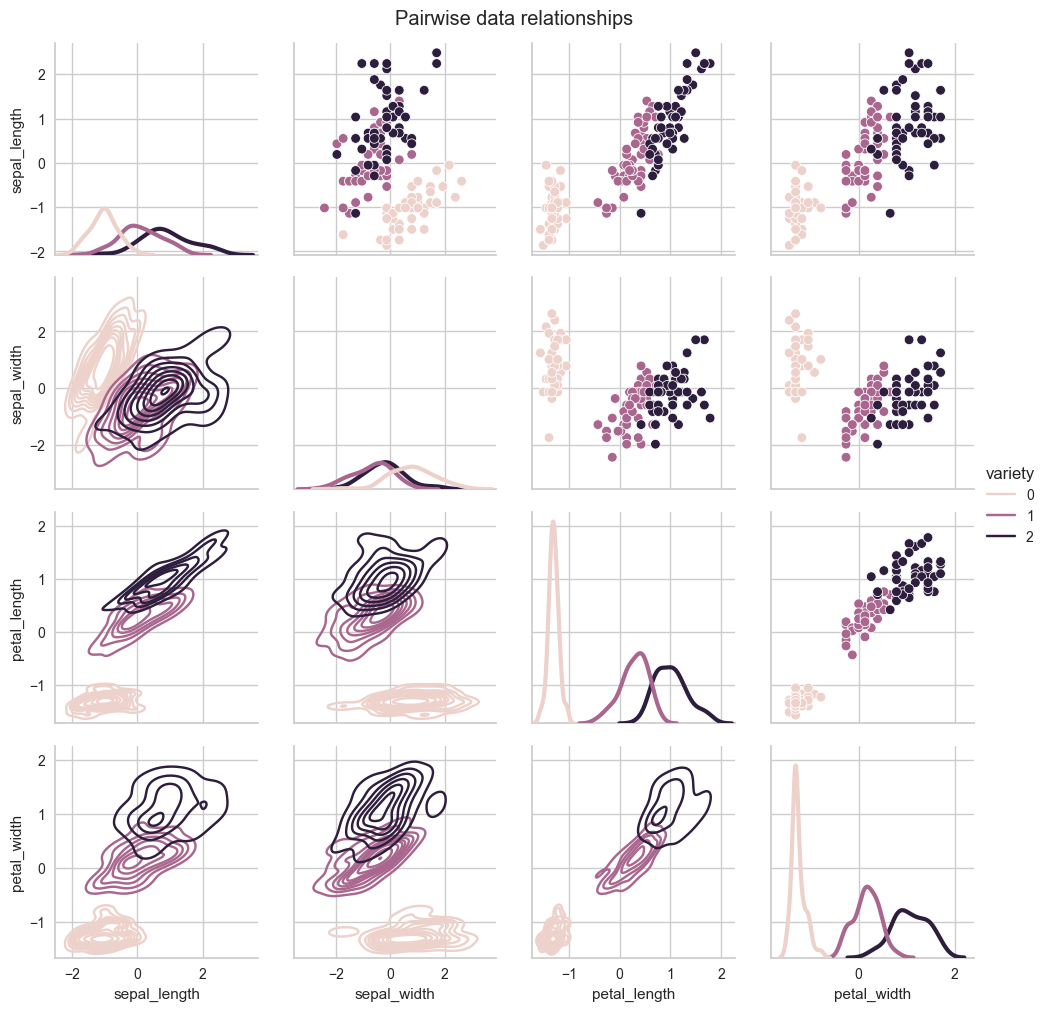

In [50]:
plot_sns_corr_class(df, target_col)

###### Heatmap with Seaborn

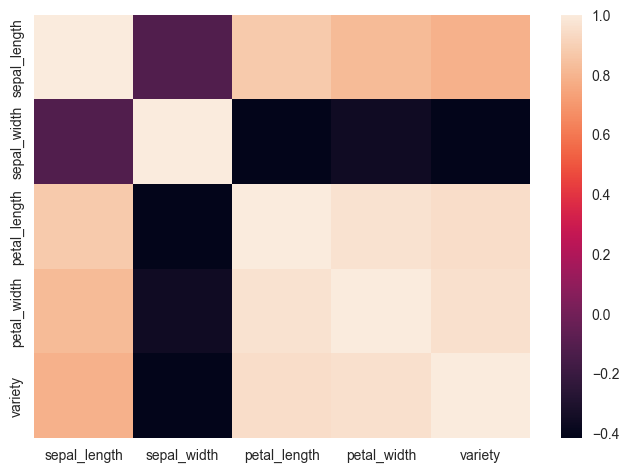

In [51]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

#### Feature importance (a priori)

##### According to decision tree

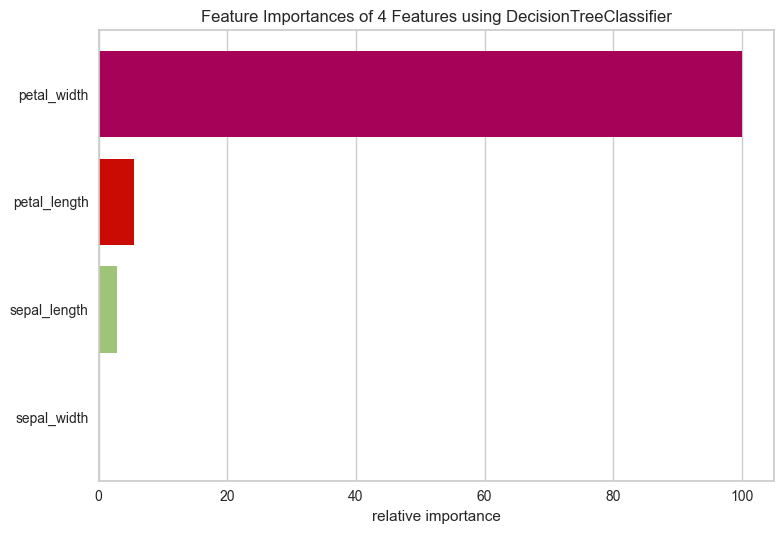

In [52]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

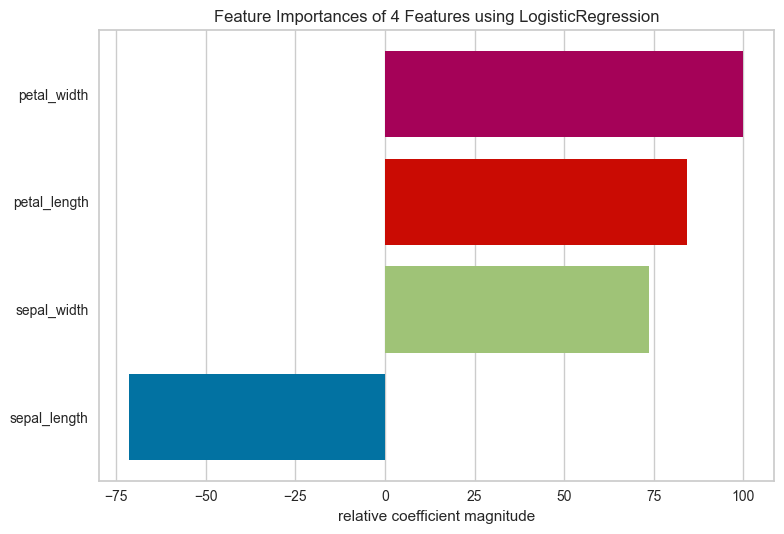

In [53]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

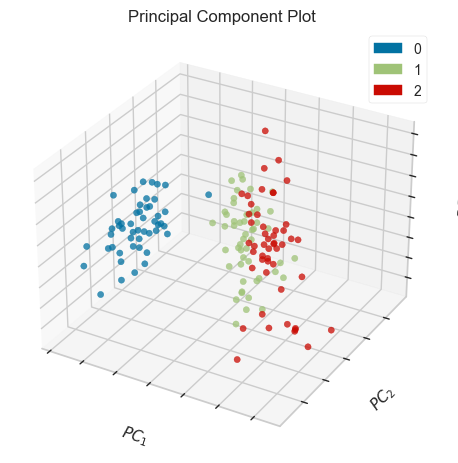

In [54]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

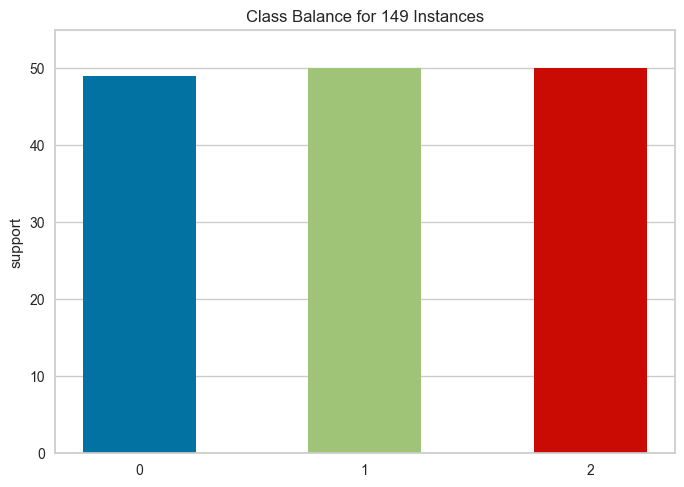

Entropy =  0.9999589074278229


In [55]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

#### Check columns that should be dropped

In [56]:
print(dropped_cols)

['petal_width']


## Splittings 

In [57]:
df = df_copy

#### Splitting dataframe in features and targets

In [58]:
y = df[target_col]

In [59]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [60]:
nb_features = len(X.columns.tolist())

In [61]:
nb_targets = len(y.unique())

In [62]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [63]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler)

##### Encoding

In [64]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [65]:
cat_selector = make_column_selector(dtype_include=object)

In [66]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [67]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [68]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=0, add_indicator=True))

In [69]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [70]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [71]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=0, add_indicator=True), StandardScaler())

In [72]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Keras neural network definition

In [73]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(BatchNormalization()) 
    model.add(Dense(layer_size, activation='selu')) 
#    model.add(LayerNormalization()) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
    model.add(Dense(nb_targets, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


##### Early Stopping

In [74]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [75]:
K_C = KerasClassifier(K_Class, batch_size=64, epochs=2000, callbacks=[es], validation_split=0.1, verbose=1) 
K_C._estimator_type = 'classifier'

##### Level-0 models

In [76]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini'))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy'))), 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=50))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2'))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2'))), 
          ('MLPC10', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPC20', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [77]:
level_1 = LogisticRegression()

##### Stacking for classification

In [78]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [79]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000


2022-11-07 10:00:39.893219: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:00:39.893265: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:00:39.893988: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 1s 145ms/step - loss: 2.7326 - accuracy: 0.0778 - val_loss: 2.5103 - val_accuracy: 0.0000e+00
Epoch 2/2000
2/2 [==============================] - 0s 18ms/step - loss: 2.7598 - accuracy: 0.1111 - val_loss: 2.4778 - val_accuracy: 0.0000e+00
Epoch 3/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.8027 - accuracy: 0.0889 - val_loss: 2.4461 - val_accuracy: 0.0000e+00
Epoch 4/2000
2/2 [==============================] - 0s 21ms/step - loss: 2.6089 - accuracy: 0.0778 - val_loss: 2.4159 - val_accuracy: 0.0000e+00
Epoch 5/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.7924 - accuracy: 0.0556 - val_loss: 2.3851 - val_accuracy: 0.0000e+00
Epoch 6/2000
2/2 [==============================] - 0s 22ms/step - loss: 2.7209 - accuracy: 0.0889 - val_loss: 2.3548 - val_accuracy: 0.0000e+00
Epoch 7/2000
2/2 [==============================] - 0s 18ms/step - loss: 2.6043 - accuracy: 0.0889 - val_loss: 2.3267 - val_accuracy: 0.0000e+

StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=0)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4d9...
                                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4d9043310>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc4d9043d60>)]))],
                   final_estimator=LogisticRegression())

### Model evaluation

#### Model scoring

2/2 [==============================] - 0s 3ms/step


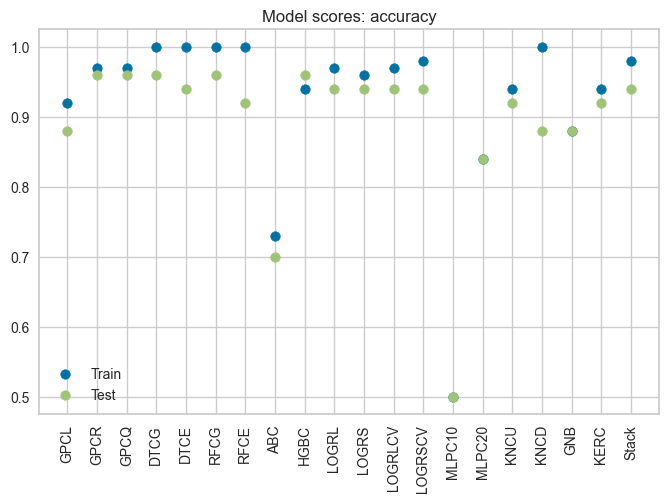

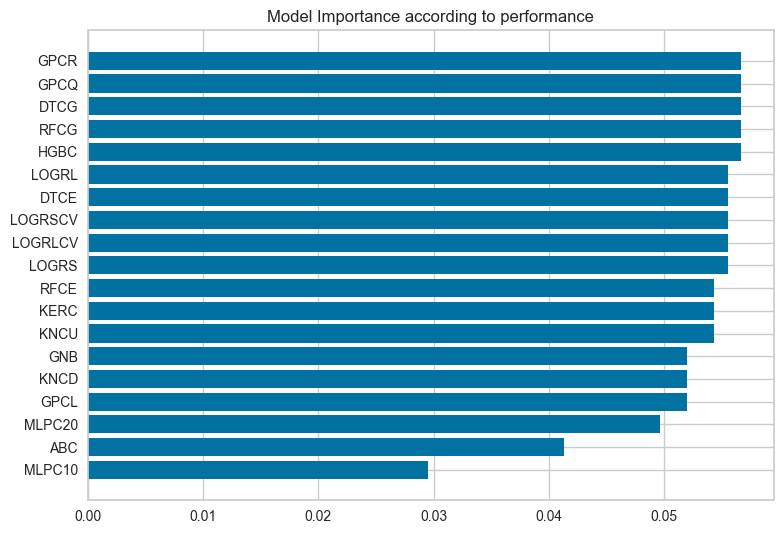

In [80]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

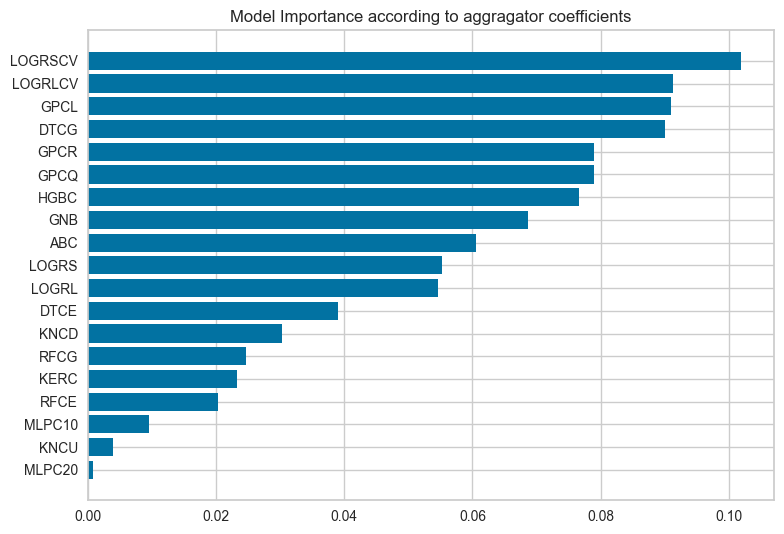

In [81]:
model_imp = plot_model_importance(model, level_1_model)

#### Feature permutation importance (a posteriori)

2/2 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://cded965d-cb7d-4c9d-bd9e-d1d04a14a9a6/assets
INFO:tensorflow:Assets written to: ram://f05086d6-025b-416f-8098-c48e4b8c5e0f/assets


2022-11-07 10:01:59.031097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:01:59.186376: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


INFO:tensorflow:Assets written to: ram://1dd4bae8-44aa-48bc-b1b3-b2cd56cd432e/assets


2022-11-07 10:01:59.738106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:01:59.738189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:01:59.738194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-11-07 10:01:59.851060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them 

2/2 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://5b8cc255-0fd5-46fa-ba00-5bcd421ab902/assets
2/2 [==============================] - 0s 2ms/step


2022-11-07 10:02:01.196303: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:01.196361: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:01.196692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:01.403940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:01.404034: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:01.404040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:01.997515: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:01.997575: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:01.997977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:02:02.043898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebu

2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:02.207325: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2/2 [==============================] - 0s 2ms/step


2022-11-07 10:02:02.785706: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:02.785800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:02.785806: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:03.321564: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:03.321629: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:03.322103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


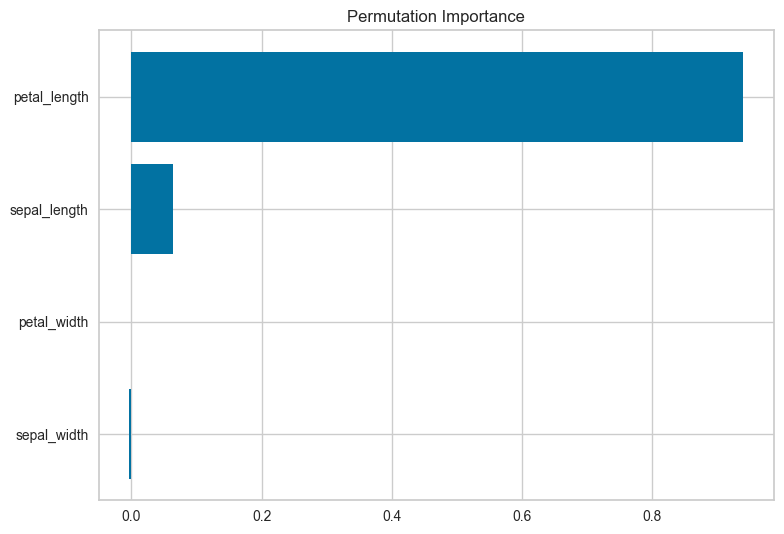

array([['sepal_width', -0.0031847133757961998],
       ['petal_width', 0.0],
       ['sepal_length', 0.0636942675159235],
       ['petal_length', 0.9394904458598727]], dtype=object)

In [82]:
plot_perm_importance(model, X_test, y_test, CPU)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [83]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://36f0853e-1a94-483f-8959-b7e9b8e85df5/assets
INFO:tensorflow:Assets written to: ram://e9a026a8-f5b5-47cd-ac4c-89971194084a/assets


2022-11-07 10:02:06.712238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:02:06.862045: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


INFO:tensorflow:Assets written to: ram://91aa367a-cfa0-4f51-b57b-10e1e244bbb9/assets


2022-11-07 10:02:07.369698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:07.369781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:07.369786: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-11-07 10:02:07.508733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them 

INFO:tensorflow:Assets written to: ram://b8f16438-941f-4687-847e-5acabc9e63f6/assets


2022-11-07 10:02:08.203888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:08.203971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:08.203977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-11-07 10:02:08.475141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them 

2/2 [==============================] - 0s 2ms/step


2022-11-07 10:02:08.815698: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:08.815759: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:08.816138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:09.229934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:09.230048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:09.230056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-11-07 10:02:09.279082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them 

2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:09.451319: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:09.805306: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:09.805368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:09.805722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


2022-11-07 10:02:10.038321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:10.038439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:10.038447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2/2 [==============================] - 0s 2ms/step


2022-11-07 10:02:10.682155: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:10.682223: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:10.682610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


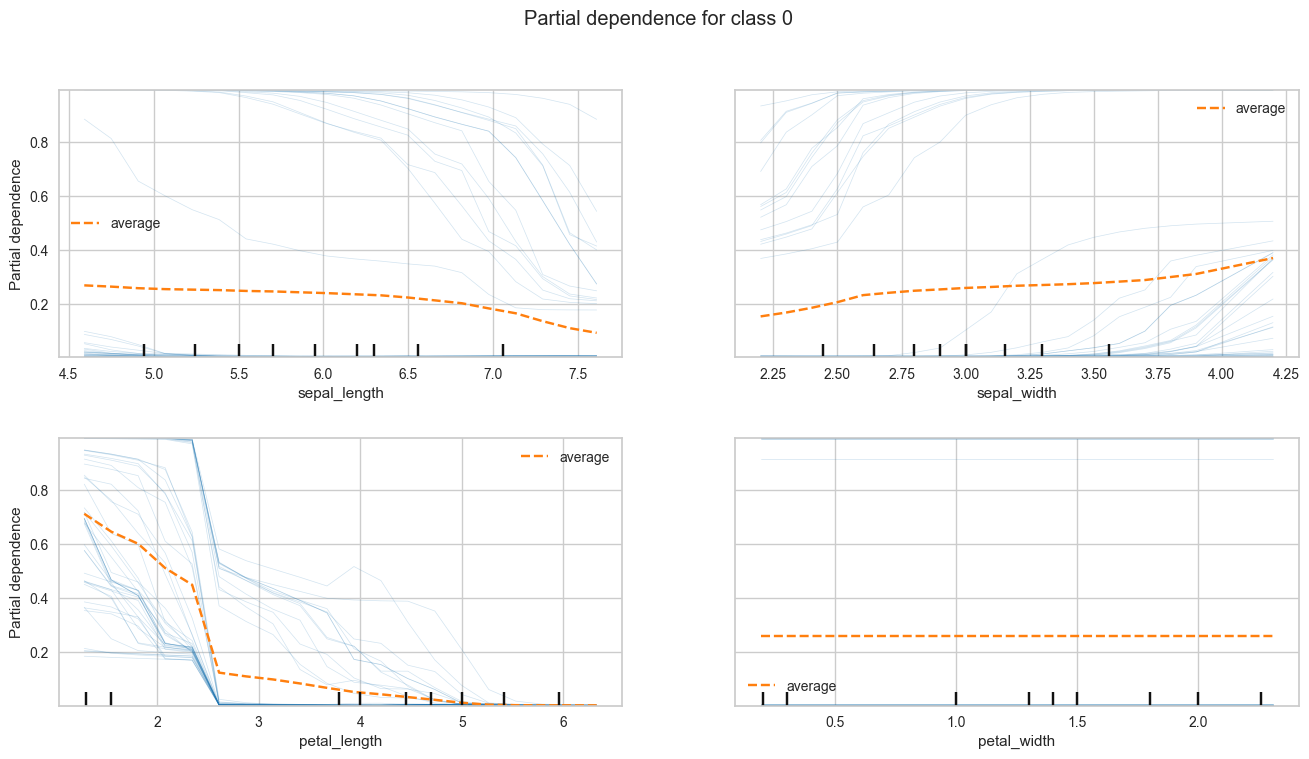

INFO:tensorflow:Assets written to: ram://5f4d6bad-e7e7-4270-b95b-a36aaa8a6c90/assets
INFO:tensorflow:Assets written to: ram://d643f28a-e39d-4d3a-a1aa-659d917c936e/assets


2022-11-07 10:02:15.881070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:02:16.045419: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


INFO:tensorflow:Assets written to: ram://b0cbb268-fa1a-4c55-b0ad-dea0bc2c6e35/assets


2022-11-07 10:02:16.587354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:16.587485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:16.587495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-11-07 10:02:16.622915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them 

2/2 [==============================] - 0s 2ms/step


2022-11-07 10:02:17.251683: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:17.251764: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:17.252226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 10:02:17.307551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-07 10:02:17.307690: W tensorflow/stream_executor/platfor

INFO:tensorflow:Assets written to: ram://de482fc2-fedc-45e8-a4a2-a09254838f7a/assets
2/2 [==============================] - 0s 2ms/step


2022-11-07 10:02:17.891438: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-07 10:02:17.891495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VLCM2S32): /proc/driver/nvidia/version does not exist
2022-11-07 10:02:17.891797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 1ms/step


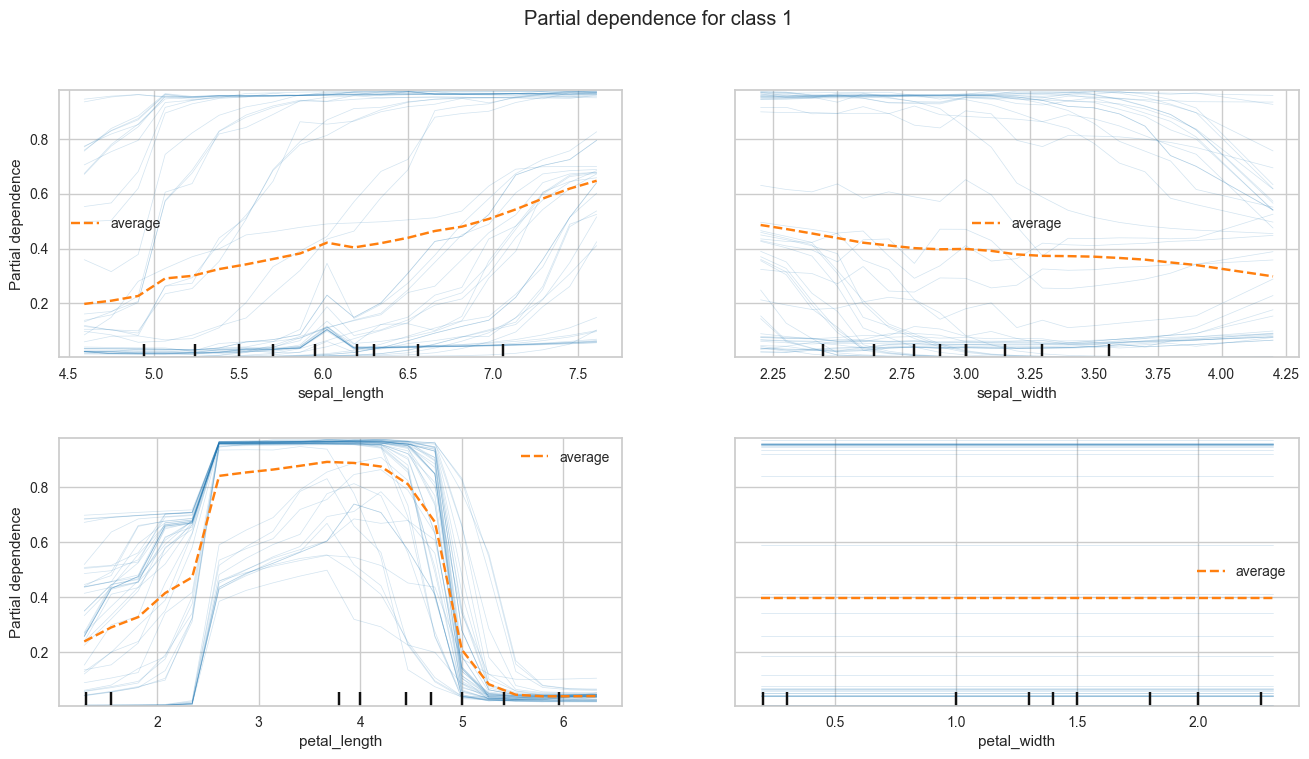

INFO:tensorflow:Assets written to: ram://40e203dd-d6e9-4065-a350-5ccc7323a999/assets
2/2 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: ram://66ed1f63-f7a4-4a7c-83b7-fd6f3bfe5365/assets
2/2 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: ram://e236883d-67c8-4774-8da3-eda2bf061622/assets
2/2 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: ram://36b647c0-c3be-4e5f-b5ec-0e4f73767072/assets
2/2 [==============================] - 0s 1ms/step


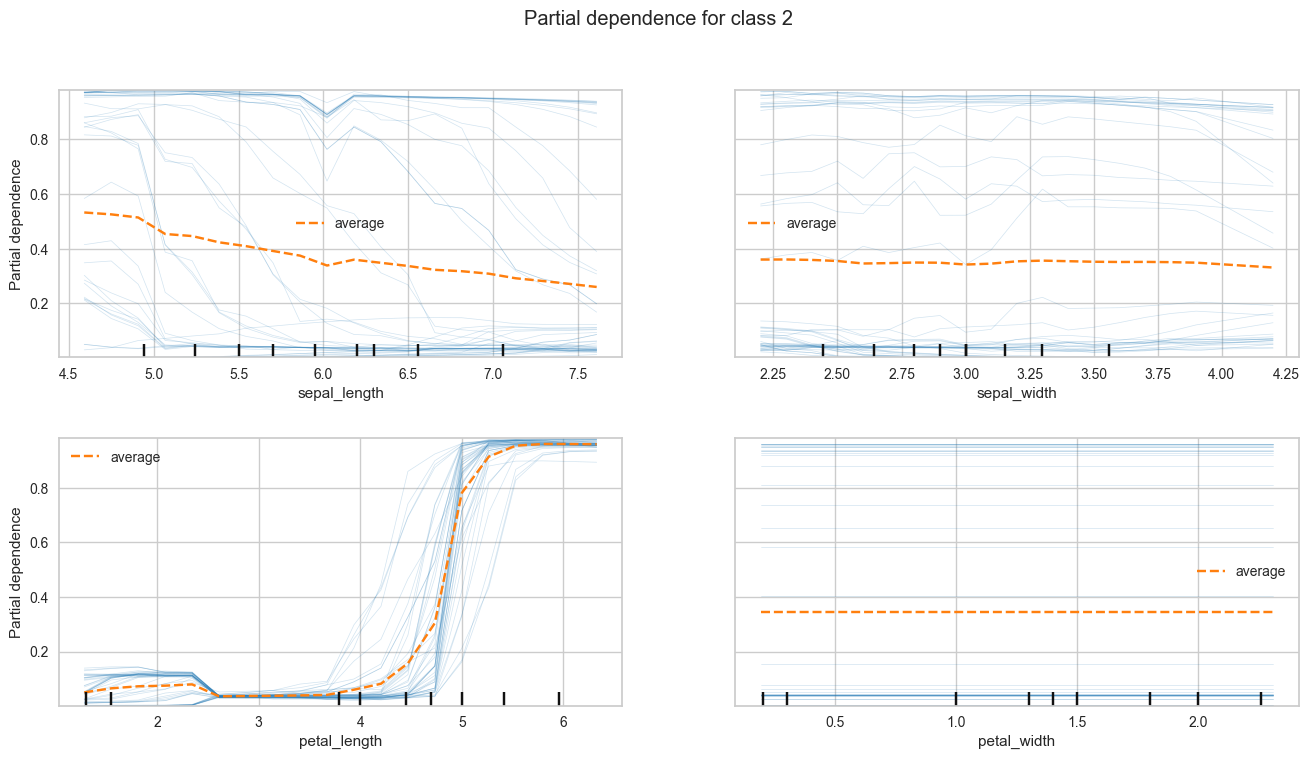

In [84]:
plot_partial_dependence(model, X_test, features_of_interest, CPU)

#### ROC/AUC

In [85]:
classes = y.unique()

2/2 [==============================] - 0s 3ms/step


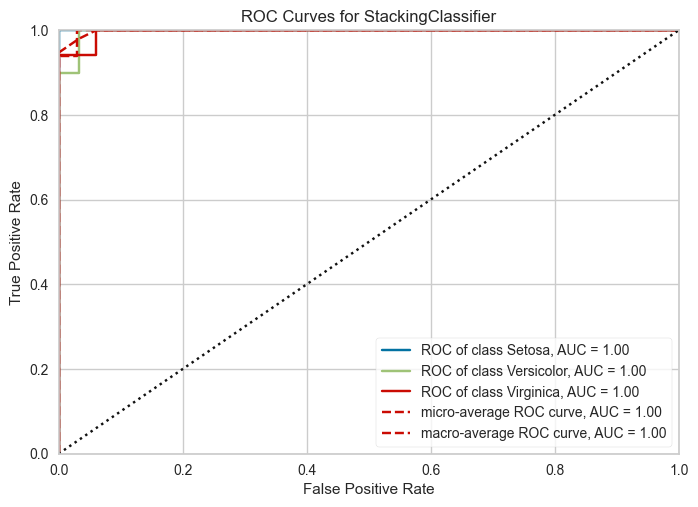

In [86]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

2/2 [==============================] - 0s 2ms/step


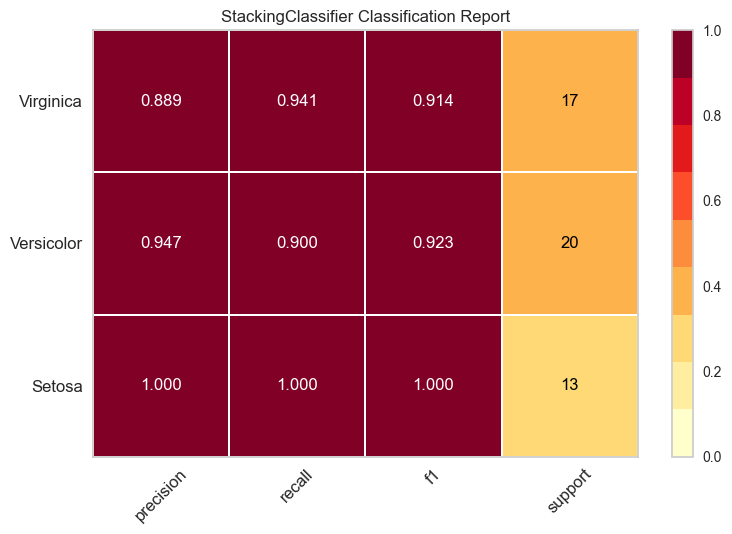

In [87]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

2/2 [==============================] - 0s 2ms/step


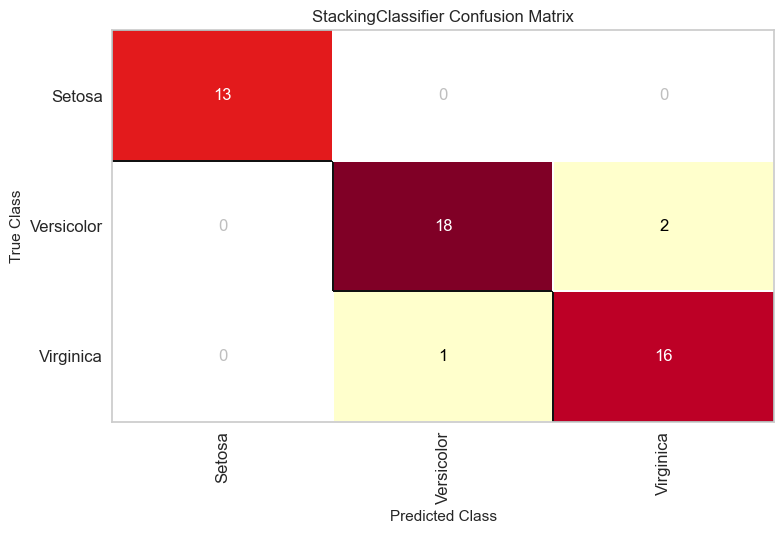

In [88]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

2/2 [==============================] - 0s 3ms/step


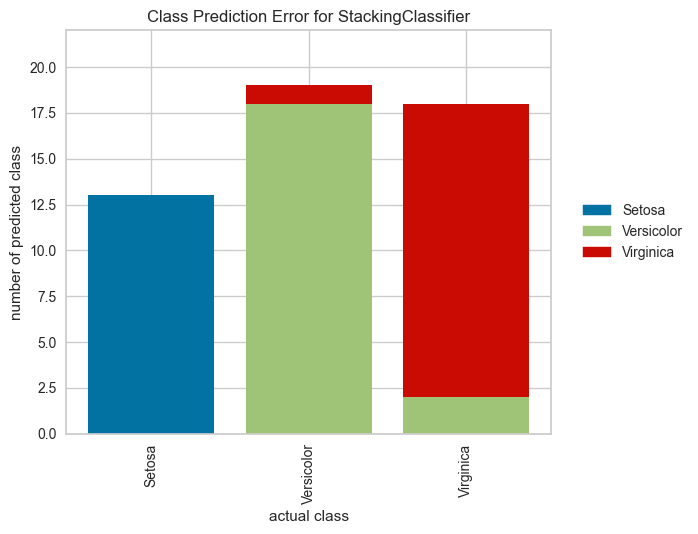

In [89]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Model

In [90]:
threshold_model = 5

In [91]:
threshold_score = 0.7

##### Filtered Level-0 models

In [92]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [93]:
level_1 = LogisticRegression()

##### Build final model

In [94]:
model = StackingClassifier(level_0_f, final_estimator=level_1)

### Final Model fitting

In [95]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 35.6 s, sys: 47.2 s, total: 1min 22s
Wall time: 9.16 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=0)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4d9...
                                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4d9043310>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('logisticregressioncv',
                                                 LogisticRegressionCV(cv=5,
                                                                      solver='saga'))]))],
                   final_estimator=LogisticRegression())

#### Final Model scoring

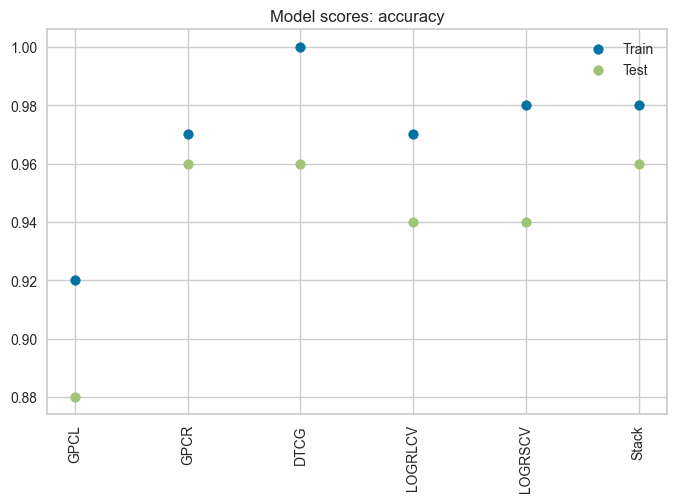

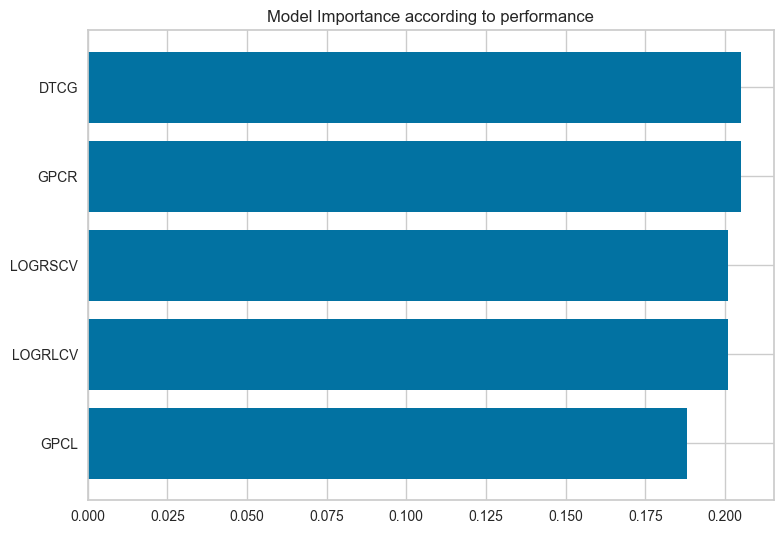

(array([['GPCL', 0.92, 0.88],
        ['GPCR', 0.97, 0.96],
        ['DTCG', 1.0, 0.96],
        ['LOGRLCV', 0.97, 0.94],
        ['LOGRSCV', 0.98, 0.94],
        ['Stack', 0.98, 0.96]], dtype=object),
 array([['GPCL', 0.18803418803418806],
        ['LOGRLCV', 0.20085470085470086],
        ['LOGRSCV', 0.20085470085470086],
        ['GPCR', 0.20512820512820512],
        ['DTCG', 0.20512820512820512]], dtype=object))

In [96]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

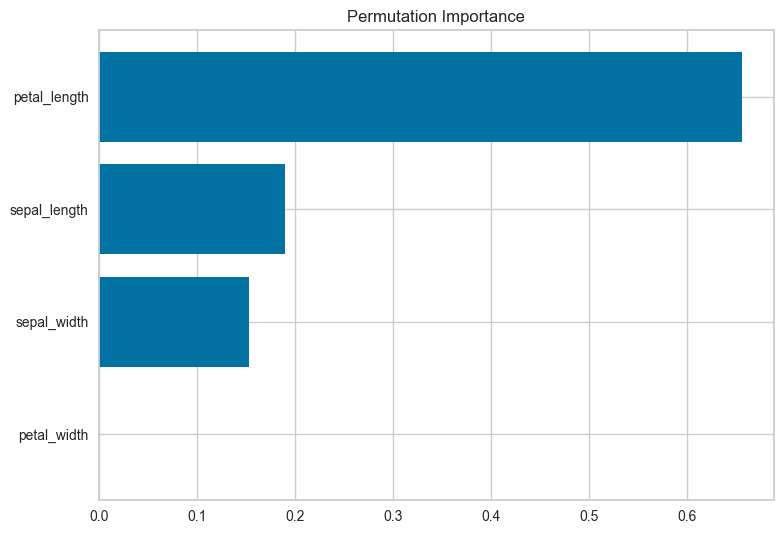

In [97]:
feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

##### Final feature elimination

In [98]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [99]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [100]:
print(dropped_cols)

['petal_width']


#### Final ROC/AUC

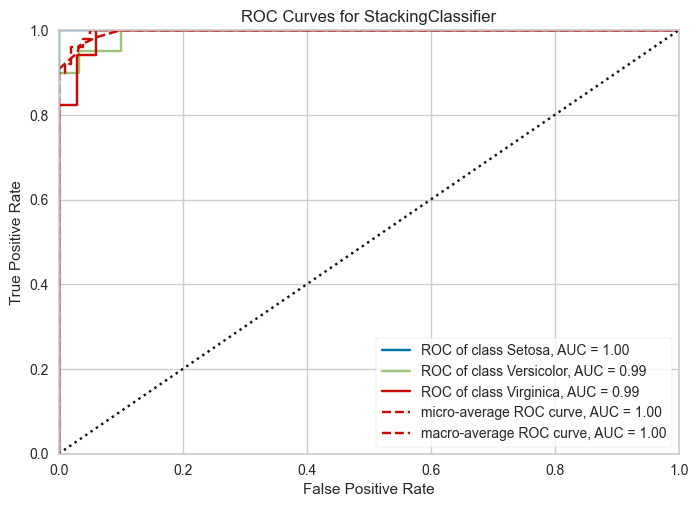

In [101]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Final Classification report

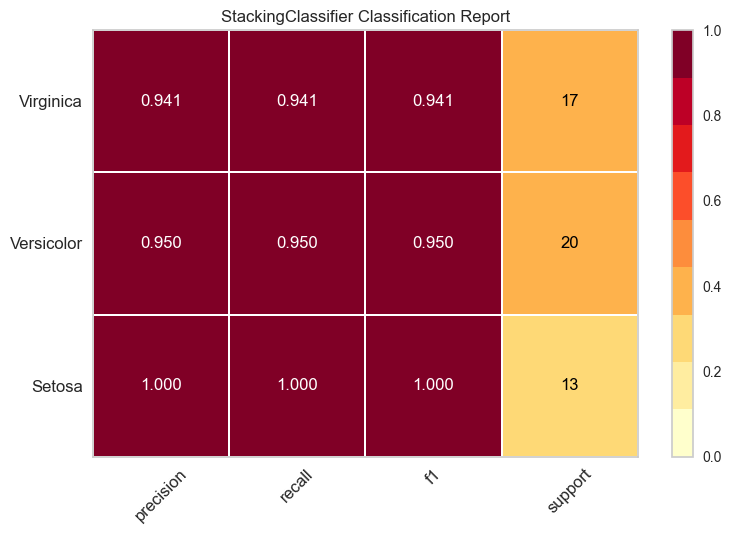

In [102]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Final Confusion matrix

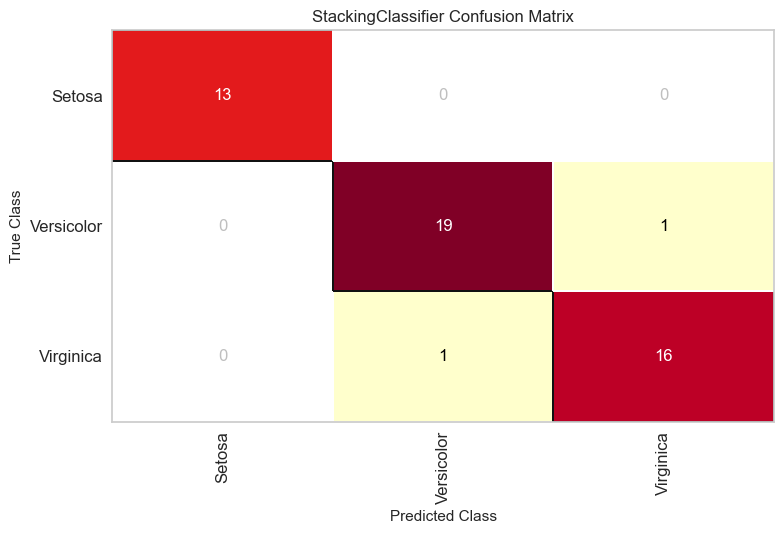

In [103]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Final Class prediction error

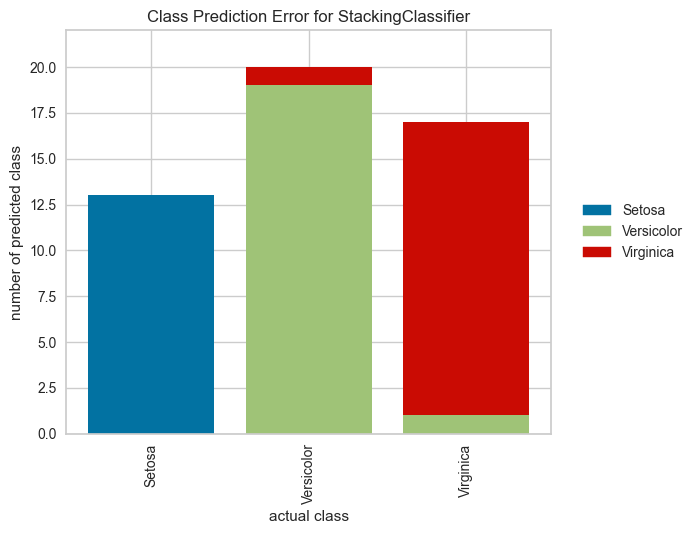

In [104]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Deployment

### Save your model

In [105]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [106]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)